In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
# Load CSV file
df = pd.read_csv("heart.csv")   # make sure file name is correct

In [58]:
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})

df['ChestPainType'] = df['ChestPainType'].map({
    'TA': 0,
    'ATA': 1,
    'NAP': 2,
    'ASY': 3
})

df['RestingECG'] = df['RestingECG'].map({
    'Normal': 0,
    'ST': 1,
    'LVH': 2
})

df['ExerciseAngina'] = df['ExerciseAngina'].map({
    'N': 0,
    'Y': 1
})

df['ST_Slope'] = df['ST_Slope'].map({
    'Down': 0,
    'Flat': 1,
    'Up': 2
})

In [59]:
X = df.drop('HeartDisease', axis=1).values
y = df['HeartDisease'].values.reshape(-1, 1)

In [60]:
epsilon = 1e-8

X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0) + epsilon

X = (X - X_mean) / X_std

In [61]:
m, n = X.shape

weights = np.zeros((n, 1))
bias = 0

learning_rate = 0.01
iterations = 1000

In [62]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [63]:
for i in range(iterations):

    # Linear combination
    z = np.dot(X, weights) + bias

    # Sigmoid
    y_hat = sigmoid(z)

    # Cost function (Log Loss)
    cost = -(1/m) * np.sum(
        y * np.log(y_hat + 1e-9) +
        (1 - y) * np.log(1 - y_hat + 1e-9)
    )

    # Gradients
    dw = (1/m) * np.dot(X.T, (y_hat - y))
    db = (1/m) * np.sum(y_hat - y)

    # Update
    weights = weights - learning_rate * dw
    bias = bias - learning_rate * db

    if i % 100 == 0:
        print(f"Iteration {i}, Cost = {cost:.4f}")

Iteration 0, Cost = 0.6931
Iteration 100, Cost = 0.4984
Iteration 200, Cost = 0.4355
Iteration 300, Cost = 0.4078
Iteration 400, Cost = 0.3932
Iteration 500, Cost = 0.3844
Iteration 600, Cost = 0.3787
Iteration 700, Cost = 0.3748
Iteration 800, Cost = 0.3720
Iteration 900, Cost = 0.3699


In [64]:
z = np.dot(X, weights) + bias
y_pred_prob = sigmoid(z)
y_pred = (y_pred_prob >= 0.5).astype(int)

accuracy = np.mean(y_pred == y) * 100
print("\nTraining Accuracy:", accuracy)



Training Accuracy: 85.40305010893246


In [65]:
TP = 0  # True Positives
TN = 0  # True Negatives
FP = 0  # False Positives
FN = 0  # False Negatives

for i in range(len(y)):
    if y[i] == 1 and y_pred[i] == 1:
        TP += 1
    elif y[i] == 0 and y_pred[i] == 0:
        TN += 1
    elif y[i] == 0 and y_pred[i] == 1:
        FP += 1
    elif y[i] == 1 and y_pred[i] == 0:
        FN += 1

# Confusion Matrix
confusion_matrix = np.array([[TP, FP],
                             [FN, TN]])

print("\nConfusion Matrix:")
print("        Predicted Yes   Predicted No")
print(f"Actual Yes     {TP}              {FN}")
print(f"Actual No      {FP}              {TN}")


Confusion Matrix:
        Predicted Yes   Predicted No
Actual Yes     438              70
Actual No      64              346


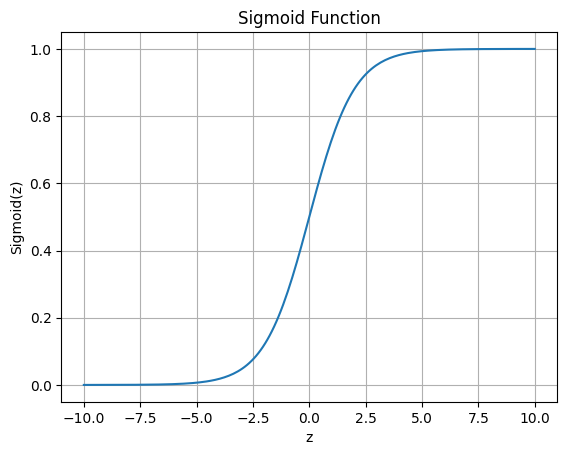

In [72]:
z = np.linspace(-10, 10, 200)
sigmoid_values = 1 / (1 + np.exp(-z))

plt.plot(z, sigmoid_values)
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.title("Sigmoid Function")
plt.grid(True)
plt.show()

In [77]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [78]:
print("\n--- Enter Patient Details ---")

age = float(input("Age: "))

sex_input = input("Sex (M/F): ").upper()
sex = 1 if sex_input == 'M' else 0

print("Chest Pain Type: TA, ATA, NAP, ASY")
cp = input("ChestPainType: ").upper()
cp_map = {'TA':0, 'ATA':1, 'NAP':2, 'ASY':3}
chestpain = cp_map[cp]

resting_bp = float(input("Resting Blood Pressure: "))
cholesterol = float(input("Cholesterol: "))
fasting_bs = int(input("Fasting Blood Sugar (0 or 1): "))

print("Resting ECG: Normal, ST, LVH")
ecg_input = input("RestingECG: ")
ecg_map = {'Normal':0, 'ST':1, 'LVH':2}
resting_ecg = ecg_map[ecg_input]

max_hr = float(input("Max Heart Rate: "))

angina_input = input("Exercise Angina (Y/N): ").upper()
exercise_angina = 1 if angina_input == 'Y' else 0

oldpeak = float(input("Oldpeak: "))

print("ST Slope: Down, Flat, Up")
slope_input = input("ST_Slope: ")
slope_map = {'Down':0, 'Flat':1, 'Up':2}
st_slope = slope_map[slope_input]



--- Enter Patient Details ---
Chest Pain Type: TA, ATA, NAP, ASY
Resting ECG: Normal, ST, LVH
ST Slope: Down, Flat, Up


In [79]:
sample = np.array([[age, sex, chestpain, resting_bp, cholesterol,
                    fasting_bs, resting_ecg, max_hr,
                    exercise_angina, oldpeak, st_slope]])


In [80]:
sample = (sample - X_mean) / X_std


In [81]:
z_sample = np.dot(sample, weights) + bias
prob = sigmoid(z_sample)

print("\nHeart Disease Probability:", prob[0][0])

if prob >= 0.5:
    print("Prediction: Heart Disease")
else:
    print("Prediction: No Heart Disease")



Heart Disease Probability: 0.6894650465389693
Prediction: Heart Disease
